In [0]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pandas import Series, DataFrame
%matplotlib inline

In [0]:
df = pd.read_csv('/content/netflix_titles.csv')

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [0]:
df_copy = df.copy()

In [5]:
df_copy.head(50)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [0]:
# diamond_data = diamond_data.drop(["Unnamed: 0"],axis=1)

df_copy = df_copy.drop(['director'], axis=1)


In [0]:
df_copy = df_copy.drop(['description'], axis=1)

In [8]:
df_copy.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies


In [0]:
df_copy = df_copy.drop(['cast'], axis=1)



In [10]:
df_copy.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy
2,70234439,TV Show,Transformers Prime,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV
3,80058654,TV Show,Transformers: Robots in Disguise,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV
4,80125979,Movie,#realityhigh,United States,"September 8, 2017",2017,TV-14,99 min,Comedies


In [0]:

# GENRE WISE ANALYSIS

In [0]:
s = df_copy['listed_in'].str.split(',').apply(Series,1).stack()
s.index = s.index.droplevel(-1)
s.name = 'listed_in'
del df_copy['listed_in']
df_copy = df_copy.join(s)

In [13]:
df_copy.head(10)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,Children & Family Movies
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,Comedies
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy
2,70234439,TV Show,Transformers Prime,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV
3,80058654,TV Show,Transformers: Robots in Disguise,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV
4,80125979,Movie,#realityhigh,United States,"September 8, 2017",2017,TV-14,99 min,Comedies
5,80163890,TV Show,Apaches,Spain,"September 8, 2017",2016,TV-MA,1 Season,Crime TV Shows
5,80163890,TV Show,Apaches,Spain,"September 8, 2017",2016,TV-MA,1 Season,International TV Shows
5,80163890,TV Show,Apaches,Spain,"September 8, 2017",2016,TV-MA,1 Season,Spanish-Language TV Shows
6,70304989,Movie,Automata,"Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,International Movies


In [14]:
gp_obj1 = df_copy.groupby('listed_in')
gp_obj1.groups

{' Anime Features': Int64Index([ 361,  362,  371,  372,  373,  381,  382,  383,  384,  385,  386,
              717,  718,  719,  722,  723, 1138, 1701, 1758, 1893, 2544, 2574,
             2579, 2936, 3182, 3367, 3840, 3841, 3842, 3909, 4133, 4262, 4844],
            dtype='int64'),
 ' Children & Family Movies': Int64Index([1119, 1522, 2112, 2197, 2535, 2721, 2942, 3036, 3184, 3185, 3367,
             3550, 3613, 3614, 3615, 3616, 3627, 4024, 4122, 4718],
            dtype='int64'),
 ' Classic & Cult TV': Int64Index([5639, 5669, 5699, 5830, 6179], dtype='int64'),
 ' Classic Movies': Int64Index([1127, 1180, 1358, 1363, 1369, 1388, 1395, 1398, 1412, 1758, 1969,
             2981, 3328, 3496, 3599, 3614, 3615, 3616, 4175, 4192, 4232, 5071],
            dtype='int64'),
 ' Comedies': Int64Index([   0,   21,   30,   40,  118,  171,  208,  275,  284,  314,
             ...
             5392, 5408, 5412, 5426, 5474, 5484, 5487, 5488, 5489, 5531],
            dtype='int64', length=310),
 ' Cri

In [15]:
df_copy.shape

(13670, 9)

In [16]:
# Get movies made per year, create new data frame
df_copy_year = pd.DataFrame(df_copy.groupby('release_year').title.nunique())
df_copy_year.tail(100)

,title
release_year,
1925,1
1942,2
1943,3
1944,3
1945,3
...,...
2016,827
2017,958
2018,1062


In [17]:
df_copy_year.nlargest(5,'title')


,title
release_year,
2018,1062
2017,958
2019,842
2016,827
2015,517


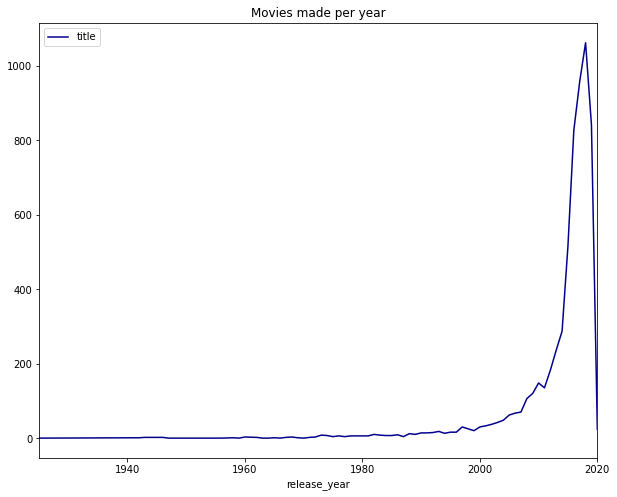

In [18]:
df_copy_year.plot.line(title = 'Movies made per year',color='DarkBlue',figsize=(10, 8));

In [19]:
len(df_copy['listed_in'].unique())

72

In [0]:
df_copy_listed_in = (pd.DataFrame(df_copy.groupby('listed_in').title.nunique())).sort_values('title',ascending=False)



In [21]:
df_copy_listed_in.head()

,title
listed_in,
International Movies,1834
Dramas,1073
Comedies,803
Documentaries,643
Action & Adventure,593


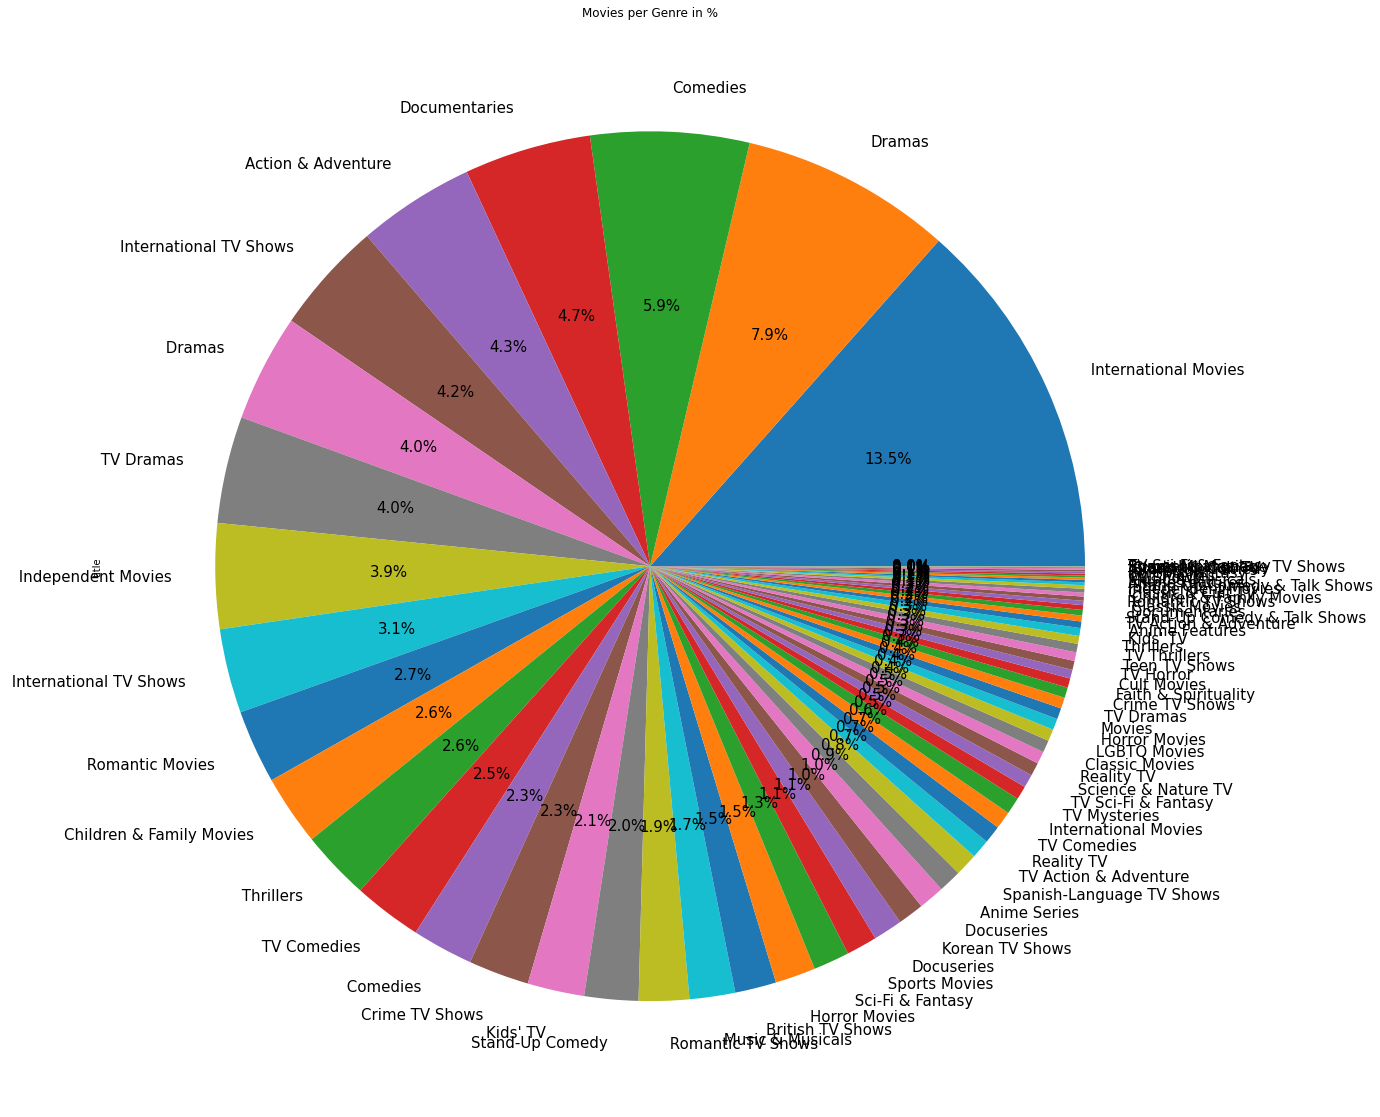

In [22]:
df_copy_listed_in['title'].plot.pie(title= 'Movies per Genre in %', figsize=(20,20), autopct='%1.1f%%',fontsize=15);

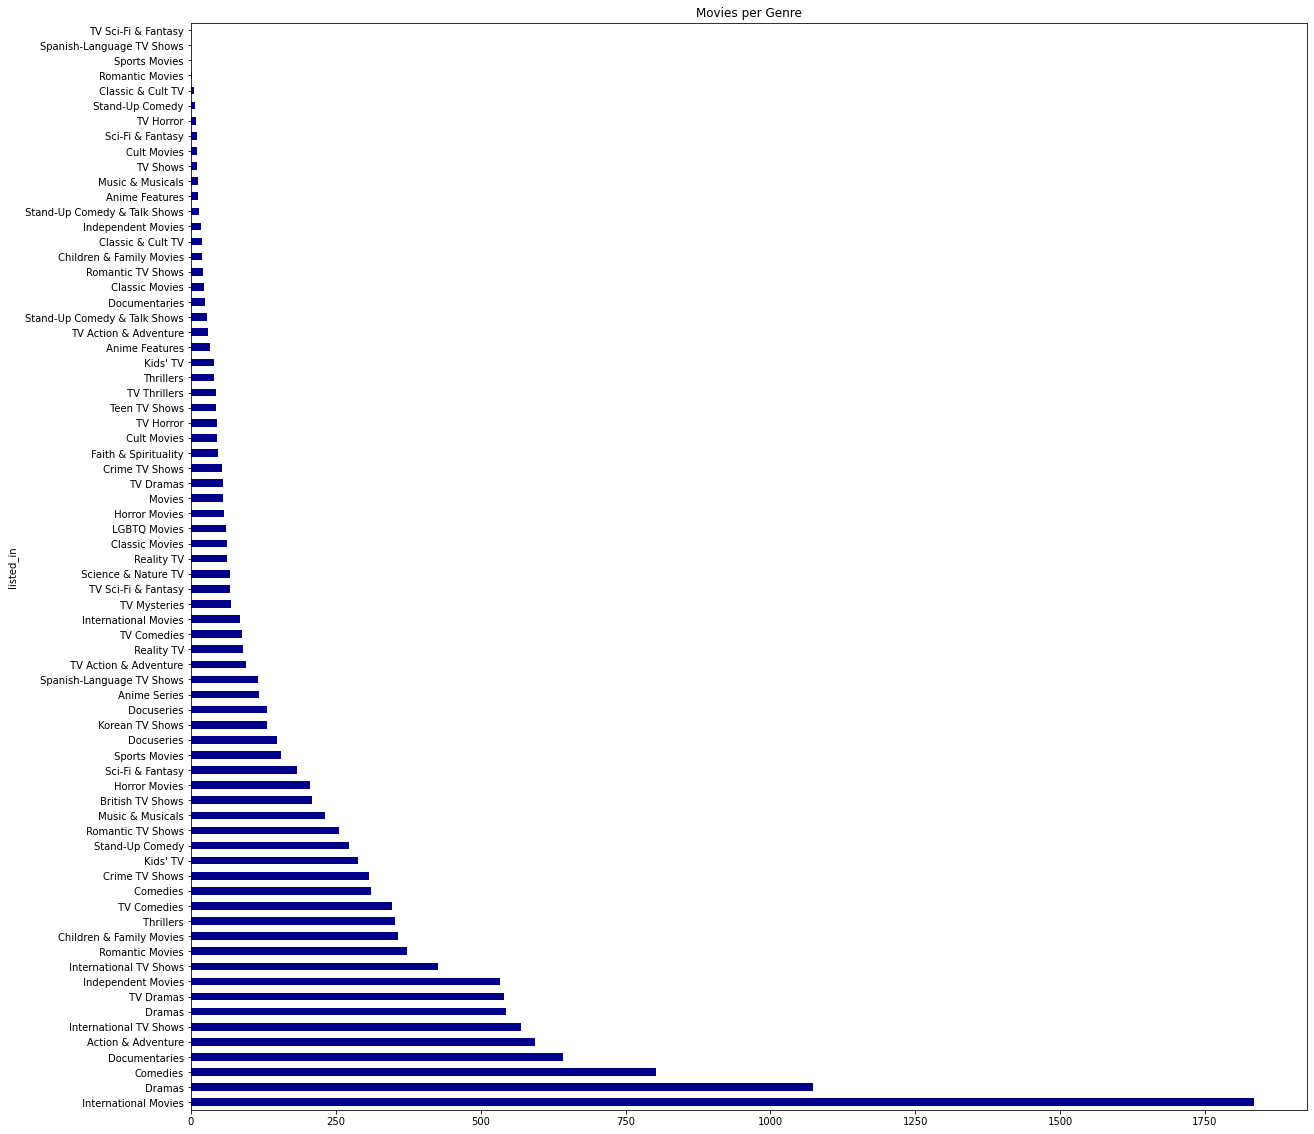

In [23]:
df_copy_listed_in['title'].plot.barh(title = 'Movies per Genre',color='DarkBlue', figsize=(20, 20));

In [0]:
new_df=df.copy()

In [0]:
new_df = new_df.drop(['director','cast','description'], axis=1)
t = new_df['country'].str.split(',').apply(Series,1).stack()
t.index = t.index.droplevel(-1)
t.name = 'country'
del new_df['country']
new_df = new_df.join(t)


In [45]:
len(new_df['country'].unique())

174

In [37]:
new_df.tail(20)

,show_id,type,title,date_added,release_year,rating,duration,listed_in,country
6216,80108373,TV Show,The Magic School Bus Rides Again,"April 13, 2018",2018,TV-Y,2 Seasons,Kids' TV,United States
6217,70196145,TV Show,New Girl,"April 11, 2019",2017,TV-14,7 Seasons,"Romantic TV Shows, TV Comedies",United States
6218,80162994,TV Show,Talking Tom and Friends,"April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Cyprus
6218,80162994,TV Show,Talking Tom and Friends,"April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Austria
6218,80162994,TV Show,Talking Tom and Friends,"April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Thailand
6219,80186475,TV Show,Pokémon the Series,"April 1, 2019",2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Japan
6220,70272742,TV Show,Justin Time,"April 1, 2016",2012,TV-Y,2 Seasons,Kids' TV,Canada
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,"April 1, 2016",2016,TV-14,2 Seasons,"International TV Shows, Reality TV",Japan
6222,70136122,TV Show,Weeds,"April 1, 2014",2012,TV-MA,8 Seasons,"TV Comedies, TV Dramas",United States
6223,70204989,TV Show,Gunslinger Girl,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows",Japan


In [46]:
gb_obj=new_df.groupby('country')
gb_obj.groups

{'': Int64Index([27, 802, 1029], dtype='int64'),
 ' Afghanistan': Int64Index([3706], dtype='int64'),
 ' Albania': Int64Index([1595], dtype='int64'),
 ' Argentina': Int64Index([129, 628, 1790, 1841, 2316, 2538, 3907, 3979, 4313, 4409, 5011,
             5193],
            dtype='int64'),
 ' Armenia': Int64Index([5005], dtype='int64'),
 ' Australia': Int64Index([ 311,  806,  916, 1208, 1225, 1417, 1489, 1902, 2125, 2599, 2916,
             2917, 3046, 3473, 3517, 3535, 3698, 3785, 3800, 4011, 4424, 4941,
             5057, 5064, 5076, 5205, 5263, 5316, 5767, 5851, 5881, 5964],
            dtype='int64'),
 ' Austria': Int64Index([343, 568, 2108, 6218], dtype='int64'),
 ' Azerbaijan': Int64Index([4349], dtype='int64'),
 ' Bangladesh': Int64Index([3645], dtype='int64'),
 ' Belgium': Int64Index([  11,   19,   21,   87,  336,  495,  504,  921,  953, 1018, 1077,
             1134, 1250, 1258, 1421, 1576, 1895, 1896, 2081, 2137, 2172, 2295,
             2474, 2830, 2843, 3222, 3289, 3375, 3647,

In [28]:
new_df.shape


(7658, 9)

In [29]:
new_df.head()




,show_id,type,title,date_added,release_year,rating,duration,listed_in,country
0,81145628,Movie,Norm of the North: King Sized Adventure,"September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",United States
0,81145628,Movie,Norm of the North: King Sized Adventure,"September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",India
0,81145628,Movie,Norm of the North: King Sized Adventure,"September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",South Korea
0,81145628,Movie,Norm of the North: King Sized Adventure,"September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",China
1,80117401,Movie,Jandino: Whatever it Takes,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,United Kingdom


In [0]:
new_df_country = (pd.DataFrame(new_df.groupby('country').title.nunique())).sort_values('title',ascending=False)


In [48]:
new_df_country

,title
country,
United States,2293
India,804
United Kingdom,482
United States,308
Canada,206
...,...
Mauritius,1
Liechtenstein,1
Latvia,1


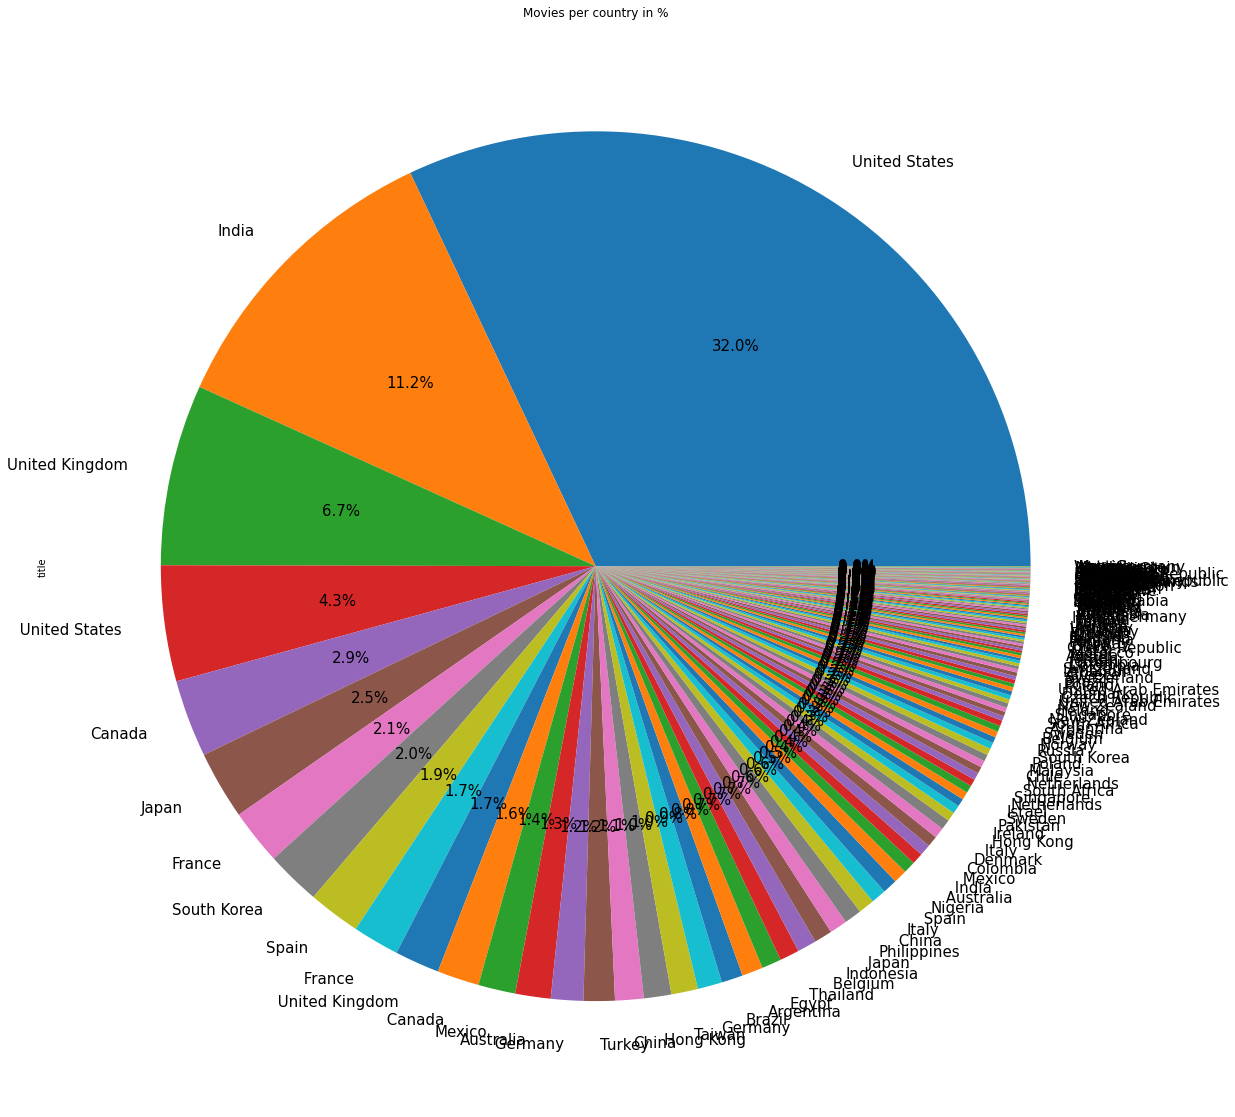

In [49]:
new_df_country['title'].plot.pie(title= 'Movies per country in %', figsize=(20,20), autopct='%1.1f%%',fontsize=15);


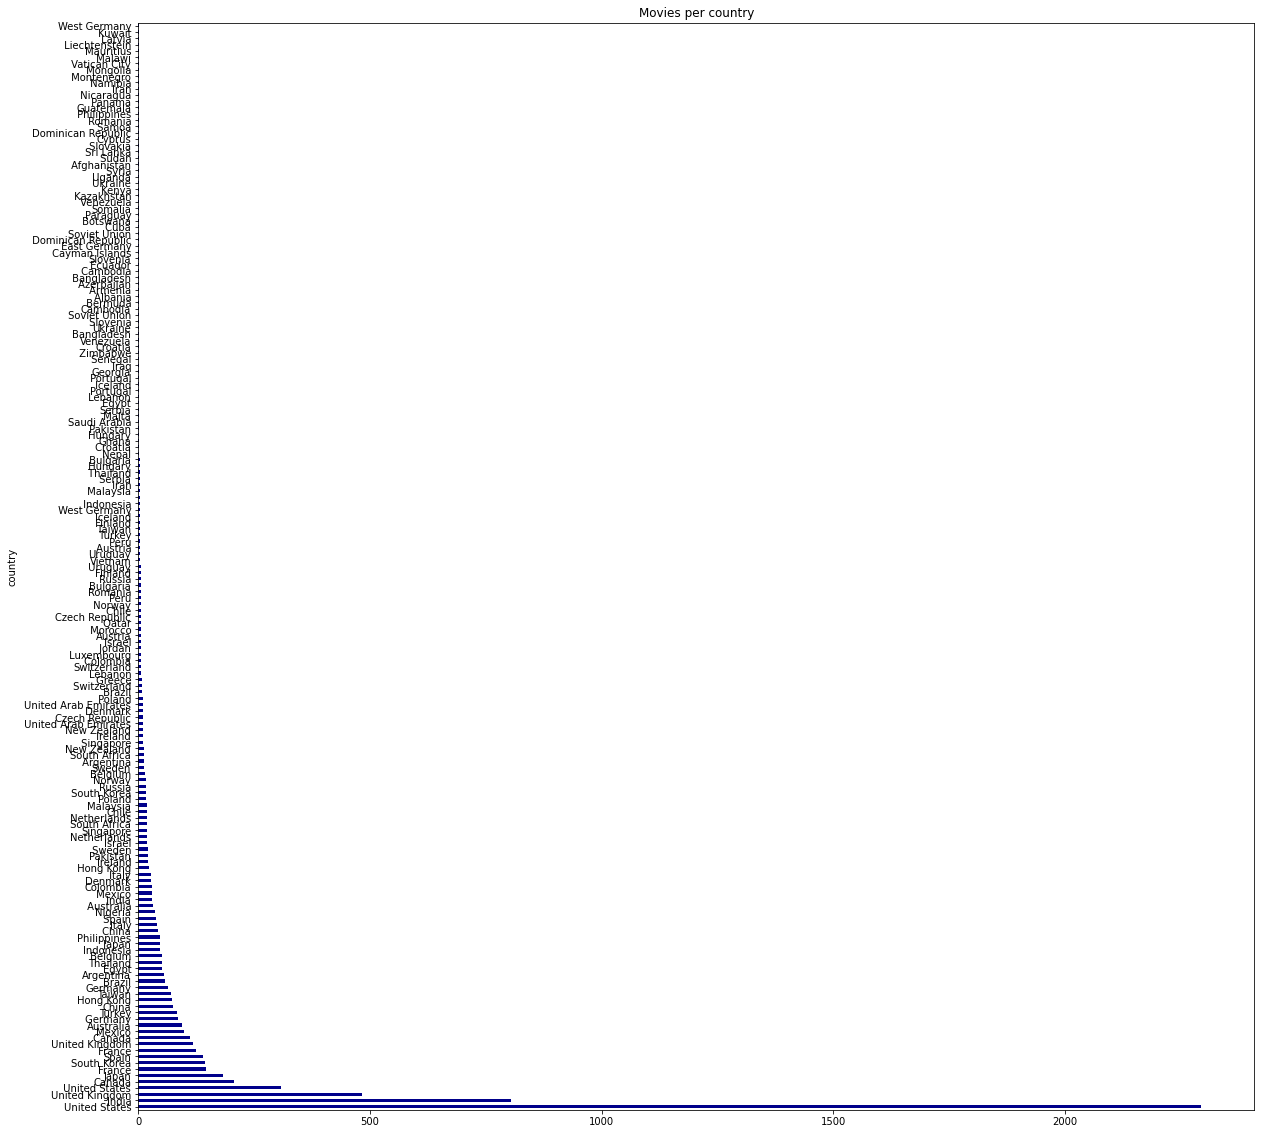

In [51]:
new_df_country['title'].plot.barh(title = 'Movies per country',color='DarkBlue', figsize=(20, 20));



In [0]:

netflix_type = df.copy()

In [56]:
netflix_type['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [0]:
netflix_type = (pd.DataFrame(netflix_type.groupby('type').title.nunique())).sort_values('title',ascending=False)


In [60]:
netflix_type.head()

,title
type,
Movie,4241
TV Show,1958


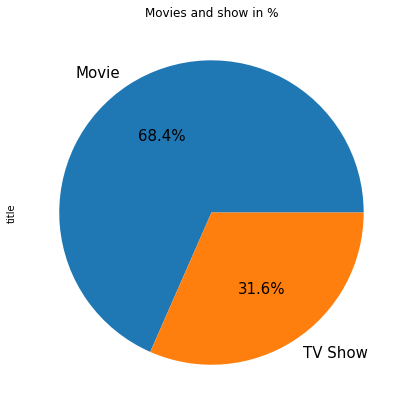

In [64]:
netflix_type['title'].plot.pie(title= 'Movies and show in %', figsize=(7,7), autopct='%1.1f%%',fontsize=15);

In [0]:
df1 = df.copy()

In [0]:
df1= df1[['title','release_year','type']]

In [74]:
df1.head()

,title,release_year,type
0,Norm of the North: King Sized Adventure,2019,Movie
1,Jandino: Whatever it Takes,2016,Movie
2,Transformers Prime,2013,TV Show
3,Transformers: Robots in Disguise,2016,TV Show
4,#realityhigh,2017,Movie


In [75]:


df1_obj1 = df1.groupby('type')
df1_obj1.groups



{'Movie': Int64Index([   0,    1,    4,    6,    7,    9,   10,   11,   12,   13,
             ...
             5571, 5572, 5573, 5574, 5575, 5577, 5578, 5579, 5580, 6231],
            dtype='int64', length=4265),
 'TV Show': Int64Index([   2,    3,    5,    8,   26,   28,   34,   39,   54,   61,
             ...
             6223, 6224, 6225, 6226, 6227, 6228, 6229, 6230, 6232, 6233],
            dtype='int64', length=1969)}

In [76]:
type(df1_obj1)

pandas.core.groupby.generic.DataFrameGroupBy

**SEEING CONTENT YEARWISE**

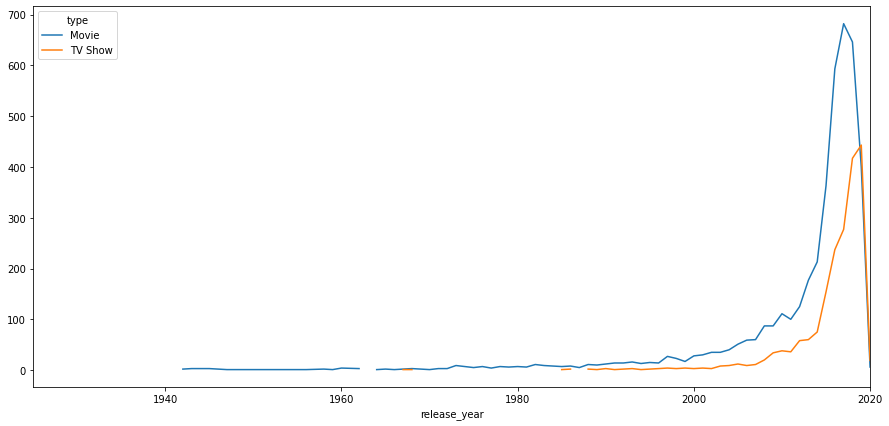

In [84]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['release_year','type']).count()['title'].unstack().plot(ax=ax)

**GETTING LATEST MOVIES AND SHOWS ON NETFLIX**

In [0]:
df_Movie=df[df['type']=='Movie']

In [0]:
df_Show=df[df['type']=='TV Show']

In [104]:
df_Movie.sort_values(by=['release_year'],ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3518,81088083,Movie,Ghost Stories,"Anurag Kashyap, Dibakar Banerjee, Karan Johar,...","Janhvi Kapoor, Sobhita Dhulipala, Sukant Goel,...",India,"January 1, 2020",2020,TV-MA,145 min,"Horror Movies, International Movies, Thrillers","The directors of Emmy-nominated ""Lust Stories""..."
3352,81127902,Movie,A Fall from Grace,Tyler Perry,"Crystal Fox, Phylicia Rashad, Cicely Tyson, Br...",NaN,"January 17, 2020",2020,TV-MA,121 min,"Dramas, Thrillers","When gentle, law-abiding Grace confesses to ki..."
3180,81214114,Movie,Bulletproof 2,Don Michael Paul,"Faizon Love, Kirk Fox, Tony Todd, Pearl Thusi,...",United States,"January 9, 2020",2020,TV-MA,97 min,"Action & Adventure, Comedies",A special agent abruptly reunites with a crimi...
3427,81060049,Movie,Leslie Jones: Time Machine,"David Benioff, D.B. Weiss",Leslie Jones,United States,"January 14, 2020",2020,TV-MA,66 min,Stand-Up Comedy,From trying to seduce Prince to battling sleep...
3195,80233408,Movie,"Live Twice, Love Once",Maria Ripoll,"Oscar Martínez, Inma Cuesta, Mafalda Carbonell...",Spain,"January 7, 2020",2020,TV-MA,102 min,"Comedies, Dramas, International Movies",When Emilio (Oscar Martínez) is diagnosed with...
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,70022548,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,NR,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
2023,70013050,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-14,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
2022,80119186,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
2011,60027945,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-PG,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...


In [105]:
df_Show.sort_values(by=['release_year'],ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3541,80117557,TV Show,Messiah,NaN,"Michelle Monaghan, Mehdi Dehbi, John Ortiz, To...",United States,"January 1, 2020",2020,TV-MA,1 Season,"TV Dramas, TV Thrillers",A wary CIA officer investigates a charismatic ...
3426,80221553,TV Show,Kipo and the Age of Wonderbeasts,NaN,"Karen Fukuhara, Sydney Mikayla, Deon Cole, Coy...",United States,"January 14, 2020",2020,TV-Y7-FV,1 Season,"Kids' TV, TV Comedies",Making her way through a world of mutant anima...
1315,81034946,TV Show,Maradona in Mexico,NaN,Diego Armando Maradona,"Argentina, United States, Mexico","November 13, 2019",2020,TV-MA,1 Season,"Docuseries, Spanish-Language TV Shows","In this docuseries, soccer great Diego Maradon..."
3325,81160763,TV Show,"Sex, Explained",NaN,Janelle Monáe,United States,"January 2, 2020",2020,TV-MA,1 Season,"Docuseries, Science & Nature TV",From the biology of attraction to the history ...
3353,80995039,TV Show,Ares,NaN,"Jade Olieberg, Tobias Kersloot, Lisa Smit, Fri...",NaN,"January 17, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Horror","Aiming to become part of Amsterdam's elite, an..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5704,70136140,TV Show,Star Trek,NaN,"William Shatner, Leonard Nimoy, DeForest Kelle...",United States,"October 1, 2017",1968,TV-PG,3 Seasons,"Classic & Cult TV, TV Action & Adventure, TV S...","Led by unflappable Capt. Kirk, the crew of the..."
5980,70155574,TV Show,The Andy Griffith Show,NaN,"Andy Griffith, Ron Howard, Don Knotts, Frances...",United States,"July 1, 2017",1967,TV-G,8 Seasons,"Classic & Cult TV, TV Comedies",Homespun humor and easygoing Sheriff Andy Tayl...
5981,70172488,TV Show,The Twilight Zone (Original Series),NaN,Rod Serling,United States,"July 1, 2017",1963,TV-PG,4 Seasons,"Classic & Cult TV, TV Sci-Fi & Fantasy","Hosted by creator Rod Serling, this groundbrea..."
4079,80161851,TV Show,Pioneers of African-American Cinema,"Oscar Micheaux, Spencer Williams, Richard E. N...",NaN,United States,"February 1, 2017",1946,TV-14,1 Season,TV Shows,This newly preserved collection features more ...


In [125]:
df_Movie['duration'] = (df_Movie['duration'].str.split(' ').apply(Series,0))[0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [126]:
df_Movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [128]:
df_Movie['duration']=pd.to_numeric(df_Movie['duration'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



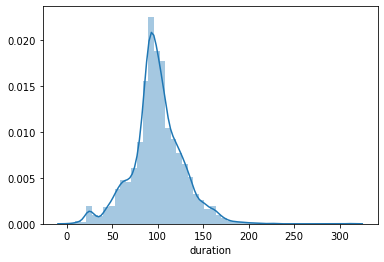

In [133]:
x=df_Movie['duration']
sns.distplot(x)
plt.show()